In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cost(arr, w, b, result):
    return np.sum((np.dot(arr, w) + b - result) ** 2) / len(result)

def gradient(arr, w, b, result):
    predictions = np.dot(arr, w) + b
    error = predictions - result
    grad_w = (2 / len(result)) * np.dot(arr.T, error)
    grad_b = (2 / len(result)) * np.sum(error)
    return grad_w, grad_b

def exec_1_descent(w, b, grad_w, grad_b, a):
    w = w - a * grad_w
    b = b - a * grad_b
    return w, b

def exec_descent(w, b, X, a, num_iterations, Y, print_rate=100):
    cost_history = []
    for i in range(num_iterations):
        grad_w, grad_b = gradient(X, w, b, Y)
        w, b = exec_1_descent(w, b, grad_w, grad_b, a)
        current_cost = cost(X, w, b, Y)
        cost_history.append(current_cost)
        if i % print_rate == 0:
            print(f"Iteration {i}: Cost = {current_cost}")
    return w, b, cost_history

def normalize_features(arr):
    means = np.mean(arr, axis=0)
    stds = np.std(arr, axis=0)
    return (arr - means)

def predict_linear_regression(X,w,b):
    X = normalize_features(X)
    return np.dot(X, w) + b

def R_2(y_true, y_pred):
    y_true = normalize_features(y_true)
    y_pred = normalize_features(y_pred)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)




In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/colab work ML/Data/linear_regression_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/colab work ML/Data/linear_regression_test.csv')

In [ ]:
X_train_pre = df_train.iloc[:, 1:26].values
Y_train_pre = df_train.iloc[:, 26].values
X_train_pre, Y_train_pre

(array([[ -10.42983652,   21.68425064,   93.05632423, ...,  -99.42351759,
          -41.15065424,  113.11719747],
        [  12.47508125,   11.65201123,  -47.62188868, ...,  -97.69430387,
           13.81611278,    8.71189399],
        [   7.69618811,   24.72954661,   43.78238349, ..., -100.87486091,
          -38.8955983 ,   34.4883343 ],
        ...,
        [  13.87629202,   26.97679336,   86.95226218, ..., -102.18093317,
          -63.05664522,  109.05468792],
        [  -4.4227684 ,   19.5222766 ,   61.59642015, ...,  -85.61169692,
            2.95671083,    4.26772866],
        [   3.86605987,   15.22206782,  -54.96995473, ...,  -97.34426689,
         -136.72256202,   37.2040866 ]]),
 array([ 5235.69092808, -1221.44214589, -1102.75886179, ...,
        -1703.21936555,  4551.70684165, -2800.86325604]))

In [ ]:
X_train_pre = X_train_pre/1000
Y_train_pre = Y_train_pre/1000
X_train_pre.shape, Y_train_pre.shape

((48000, 25), (48000,))

In [ ]:
w = np.zeros(X_train_pre.shape[1])
b = 0

In [ ]:
sorter = np.argsort(Y_train_pre)
X_train_pre = X_train_pre[sorter]
Y_train_pre = Y_train_pre[sorter]

In [ ]:
X_train_pre. astype(np.float64), Y_train_pre.astype(np.float64)

(array([[-0.00223401,  0.02076971, -0.00359755, ..., -0.10421831,
         -0.0370315 , -0.05569966],
        [ 0.01099147,  0.02303365, -0.02955377, ..., -0.09533413,
         -0.00734837, -0.02703303],
        [ 0.01570229,  0.01352043,  0.02338259, ..., -0.0875345 ,
          0.00537109,  0.10100143],
        ...,
        [ 0.00817798,  0.01710942,  0.12840462, ..., -0.10399529,
          0.03851486,  0.00458654],
        [ 0.0247159 ,  0.02811162,  0.04728368, ..., -0.09990468,
         -0.0116851 , -0.05314334],
        [ 0.00882833,  0.02497416,  0.07418573, ..., -0.10527761,
          0.01050875,  0.09697969]]),
 array([-7.88517887, -6.90673607, -6.90444298, ...,  9.2372792 ,
         9.36322969,  9.52706213]))

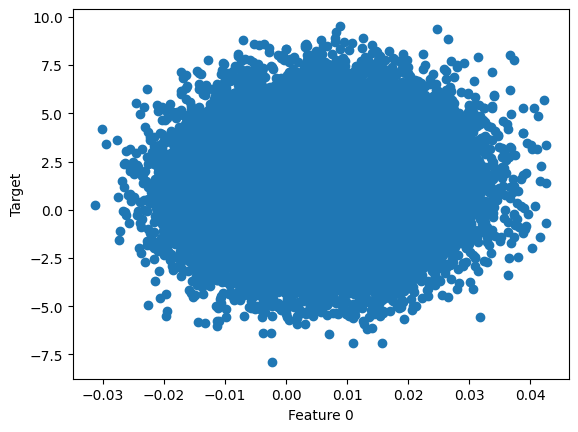

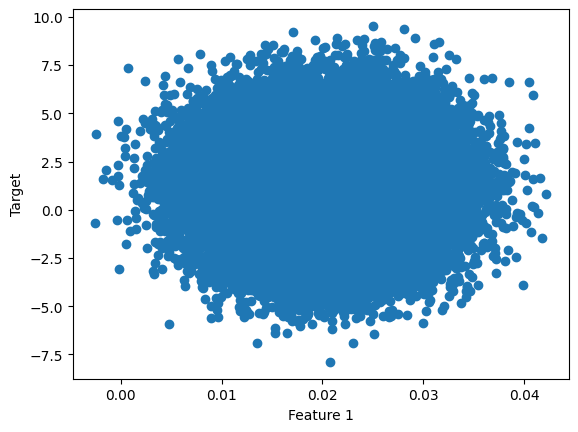

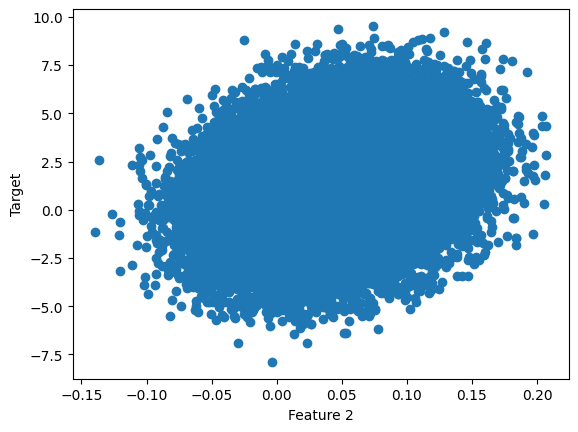

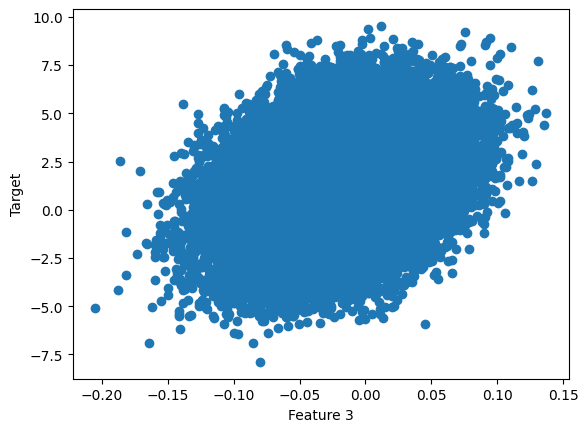

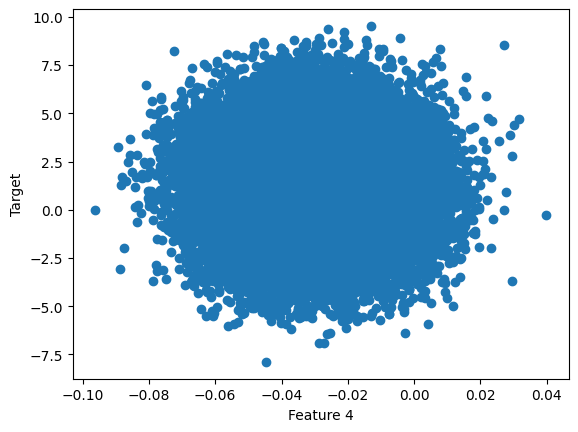

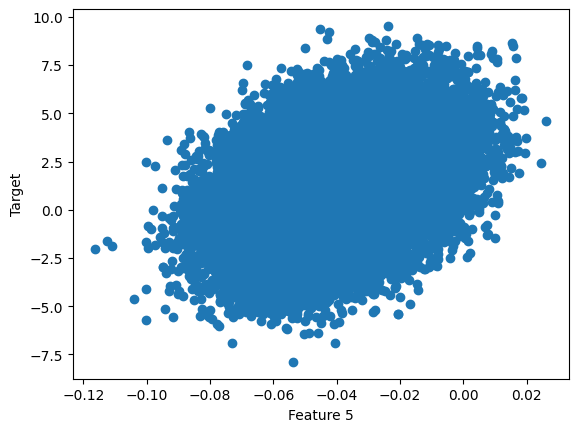

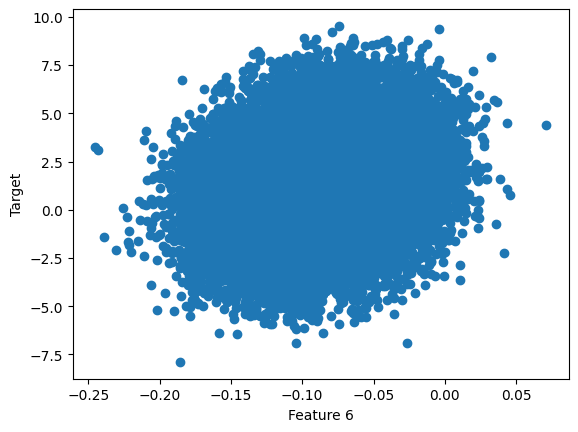

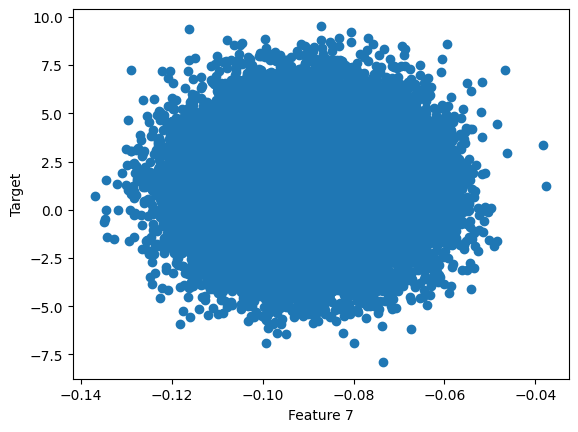

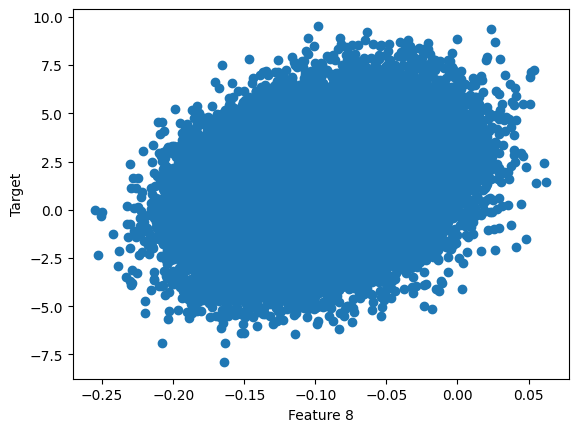

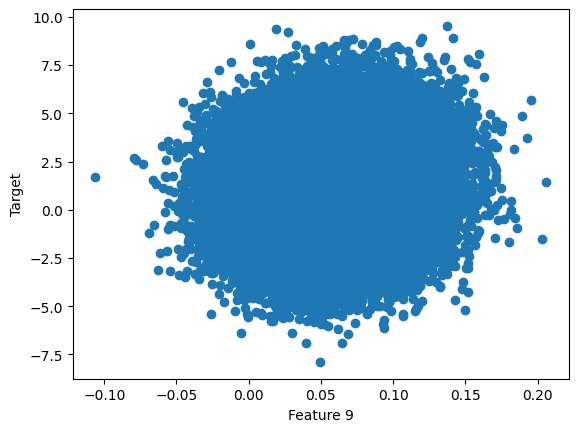

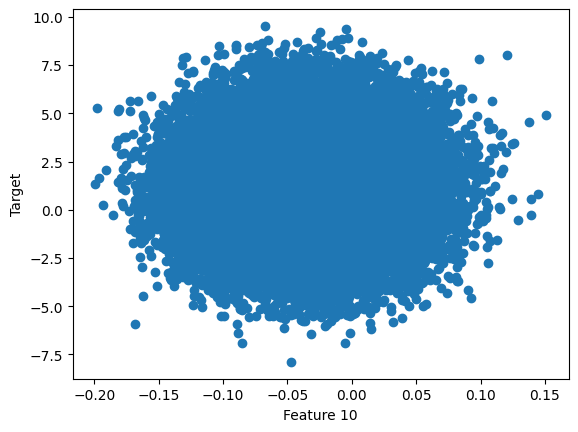

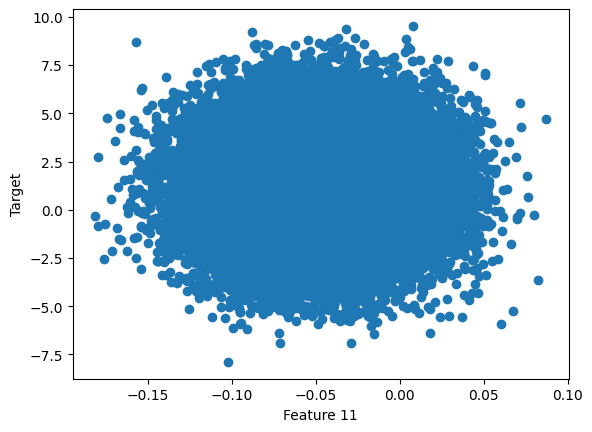

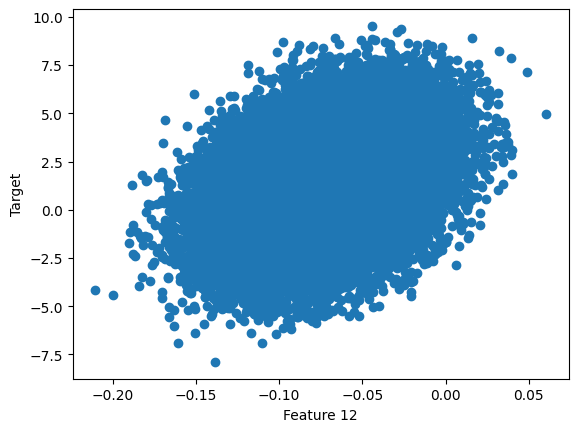

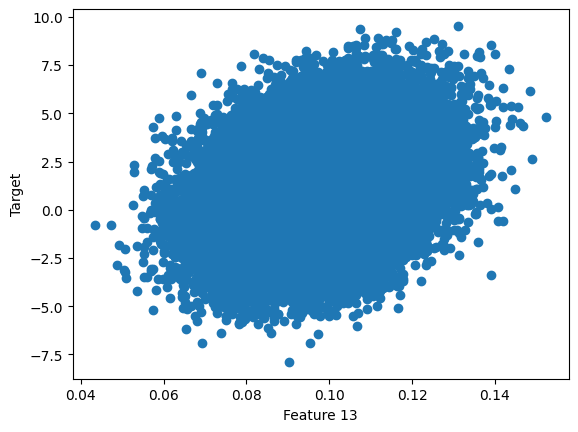

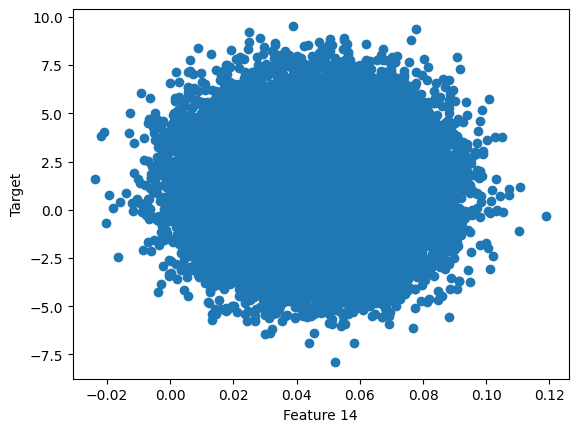

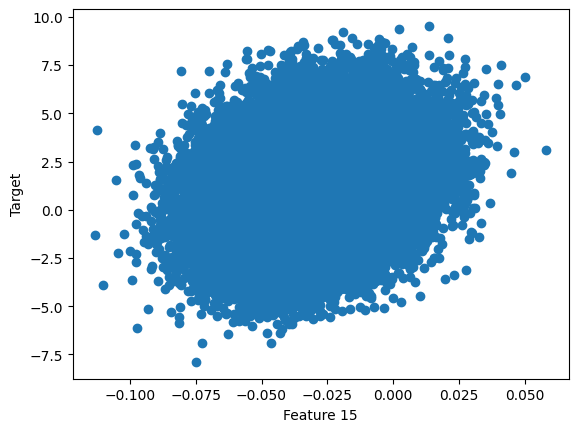

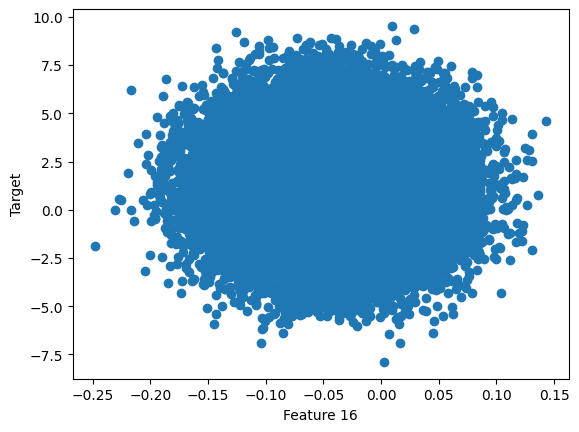

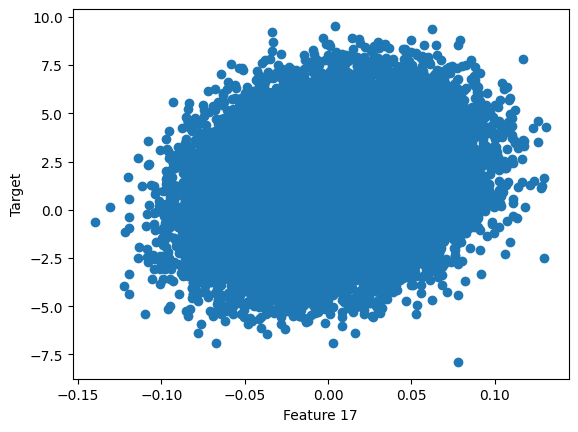

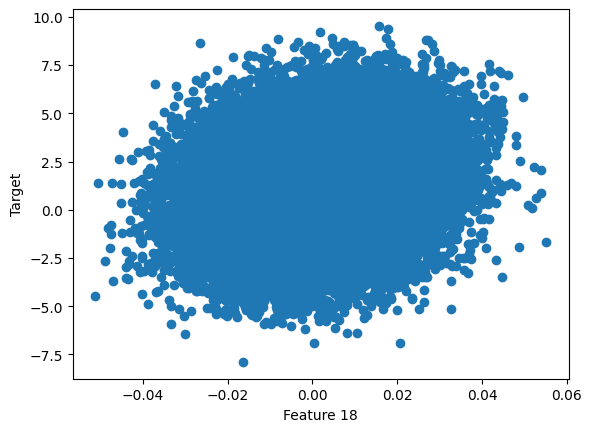

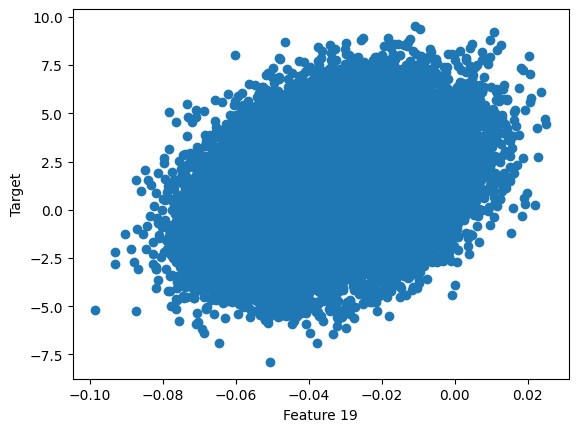

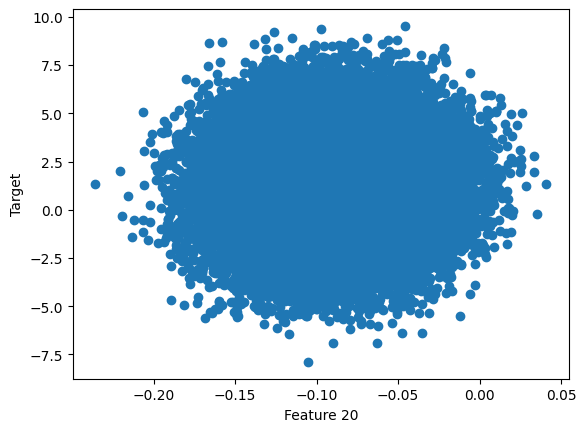

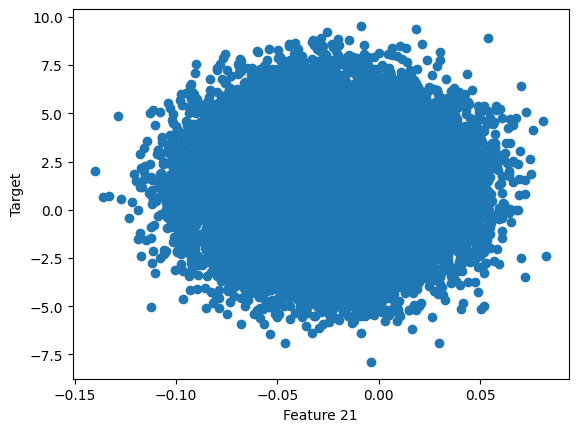

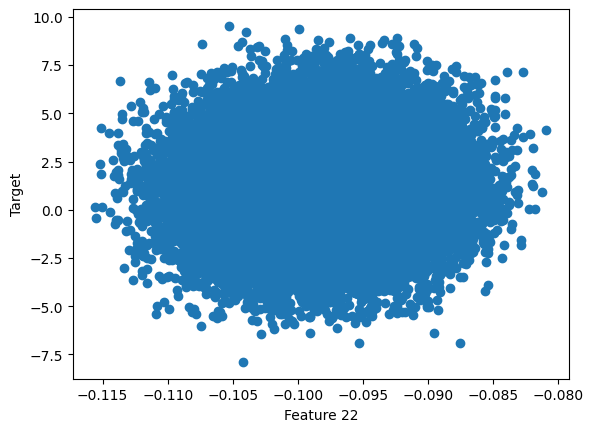

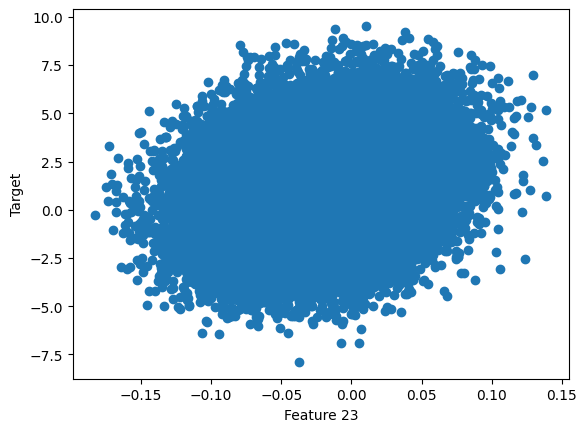

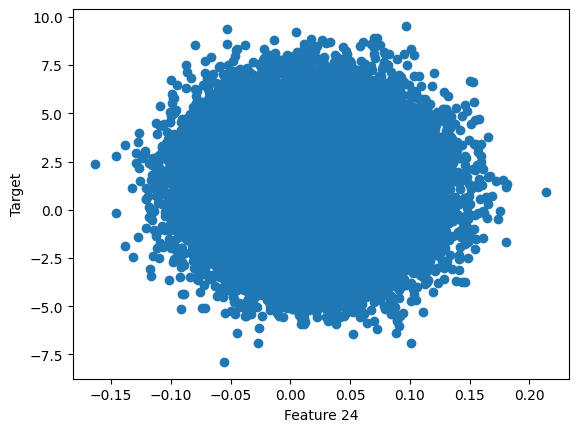

In [ ]:
for i in range(X_train_pre.shape[1]):
  plt.scatter(X_train_pre[:,i],Y_train_pre)
  plt.xlabel(f'Feature {i}')
  plt.ylabel('Target')
  plt.show()

Stuff

In [ ]:
w,b, cost_history = exec_descent(w = w , b = b , X = X_train_pre, a = 0.1, num_iterations = 120000, Y = Y_train_pre, print_rate=1000)

Iteration 0: Cost = 5.612100006615459
Iteration 1000: Cost = 3.4277599381098898
Iteration 2000: Cost = 2.6646710036040533
Iteration 3000: Cost = 2.1698386583769347
Iteration 4000: Cost = 1.8314834737889238
Iteration 5000: Cost = 1.5874336575412626
Iteration 6000: Cost = 1.40241998382158
Iteration 7000: Cost = 1.2559724034177613
Iteration 8000: Cost = 1.1358938350120575
Iteration 9000: Cost = 1.034696012875542
Iteration 10000: Cost = 0.9476252447546526
Iteration 11000: Cost = 0.8715516557939085
Iteration 12000: Cost = 0.8043335154963482
Iteration 13000: Cost = 0.7444466874449169
Iteration 14000: Cost = 0.6907643231840548
Iteration 15000: Cost = 0.6424231092454421
Iteration 16000: Cost = 0.598740247643803
Iteration 17000: Cost = 0.5591607155205361
Iteration 18000: Cost = 0.5232229351964761
Iteration 19000: Cost = 0.4905358527322595
Iteration 20000: Cost = 0.46076322404690906
Iteration 21000: Cost = 0.43361254513081404
Iteration 22000: Cost = 0.4088270355812915
Iteration 23000: Cost = 0.3

In [ ]:
Y_pred = predict_linear_regression(X_train_pre, w, b)
R_2(Y_train_pre, Y_pred)

0.9740420374847888

In [ ]:
X_test = df_test.iloc[:, 1:26].values / 1000
Y_final_pred = predict_linear_regression(X_test, w, b)
Y_final_pred *= 1000

In [ ]:
Y_final_pred

array([5554.39780197, 9029.41875589, 8635.6790152 , ..., 9645.08066218,
       4230.46283835, 5054.54576447])